In [1]:
# Importing libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
# Importing file
df = pd.read_csv(r"C:\Users\joaoa\Desktop\Ironhack\Labs\lab-customer-analysis-round-7\files_for_lab\csv_files\marketing_customer_analysis.csv")

# Standardizing columns names
cols = []
for i in range(len(df.columns)):
    cols.append(df.columns[i].lower().replace(" ","_"))
df.columns = cols
df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [3]:
# Work already done in "Lab Customer Analysis Round 6":

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Normalizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = MinMaxScaler() 
normalized_X = scaler.fit_transform(num_X) 
normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = False)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([normalized_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7594
The mean squared error of the model is = 20439.22
The root mean squared error of the model is = 142.97
The mean absolute error of the model is = 95.85


In [4]:
# Using a different method of scaling the numerical variables (standardization), which align it more towards a normal distribution

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Standardizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = StandardScaler()
stand_X = scaler.fit_transform(num_X)
stand_X = pd.DataFrame(stand_X, columns = num_X.columns)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = False)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([stand_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))
print("This try did not improved the model")

R2 value is = 0.7584
The mean squared error of the model is = 20524.07
The root mean squared error of the model is = 143.26
The mean absolute error of the model is = 95.78
This try did not improved the model


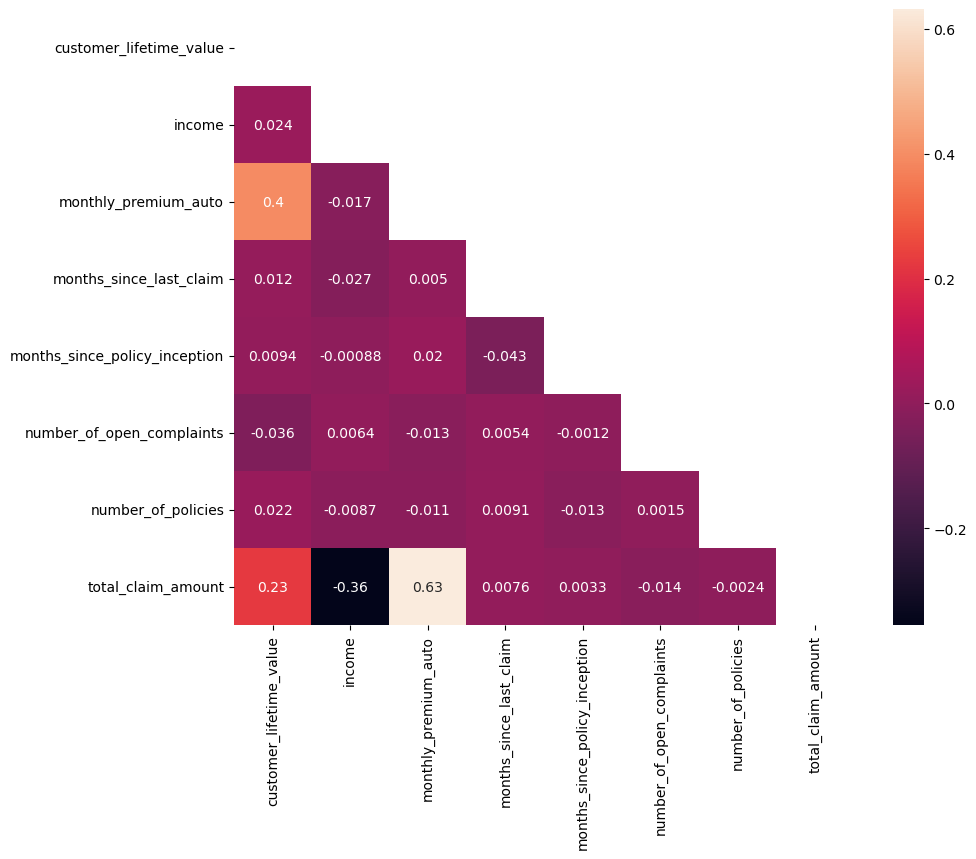

R2 value is = 0.732
The mean squared error of the model is = 22762.58
The root mean squared error of the model is = 150.87
The mean absolute error of the model is = 100.9
This try did not improve the model


In [5]:
# Using the concept of multicollinearity and remove insignificant variables

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Checking the multicollinearity between the features
numerical = df.select_dtypes(include=np.number)
correlations_matrix = numerical.corr()
correlations_matrix
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlations_matrix, mask = mask, annot = True)
plt.show()

# Normalizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = MinMaxScaler() 
normalized_X = scaler.fit_transform(num_X) 
normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

# Dropping "monthly_premium_auto" column since it has a correlation equal or higher than of 0.4 with other features
normalized_X = normalized_X.drop(["monthly_premium_auto"], axis = 1)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = False)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([normalized_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))
print("This try did not improve the model")

In [6]:
# Dropping first dummie in "One hot enconding"

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Normalizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = MinMaxScaler() 
normalized_X = scaler.fit_transform(num_X) 
normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = True)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([normalized_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))
print("This try did not improve the model")

R2 value is = 0.7584
The mean squared error of the model is = 20523.24
The root mean squared error of the model is = 143.26
The mean absolute error of the model is = 95.74
This try did not improve the model


In [7]:
# Finding the best ratio of train-test split

a = 0.1
r2 = 0
test_size = 0
while a < 0.91:

    # Splitting X-Y
    Y = df["total_claim_amount"]
    X = df.drop(["total_claim_amount", "customer"], axis = 1)

    # Normalizing X numerical values
    num_X = X.select_dtypes(include=np.number)
    scaler = MinMaxScaler() 
    normalized_X = scaler.fit_transform(num_X) 
    normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

    # Creating a new dataframe with X categorical values
    categ_X = X.select_dtypes(include = object)

    # One hot enconding
    dummies_X = pd.get_dummies(categ_X, drop_first = False)

    # Standardizing columns names
    cols2 = []
    for i in range(len(dummies_X.columns)):
        cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
    dummies_X.columns = cols2

    # Concatenating numerical and categorical dataframes
    X = pd.concat([normalized_X, dummies_X], axis = 1)

    # Train-test split
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = a, random_state = 0)

    # Creating the linear model
    lm = linear_model.LinearRegression()
    model = lm.fit(X_train, Y_train)

    # Predicting the test set results
    Y_predictions = model.predict(X_test)

    # Model descriptors
    if r2_score(Y_test, Y_predictions) > r2:
        r2 = r2_score(Y_test, Y_predictions)
        test_size = a
    
    a += 0.01

print("R2:", round(r2, 4))
print("Test size:", round(test_size, 2))

R2: 0.7656
Test size: 0.29


In [8]:
# Using the best ratio of train-test split (71%-29%)

# Splitting X-Y
Y = df["total_claim_amount"]
X = df.drop(["total_claim_amount", "customer"], axis = 1)

# Normalizing X numerical values
num_X = X.select_dtypes(include=np.number)
scaler = MinMaxScaler() 
normalized_X = scaler.fit_transform(num_X) 
normalized_X = pd.DataFrame(normalized_X, columns = num_X.columns)

# Creating a new dataframe with X categorical values
categ_X = X.select_dtypes(include = object)

# One hot enconding
dummies_X = pd.get_dummies(categ_X, drop_first = False)

# Standardizing columns names
cols2 = []
for i in range(len(dummies_X.columns)):
    cols2.append(dummies_X.columns[i].lower().replace(" ","_"))
dummies_X.columns = cols2

# Concatenating numerical and categorical dataframes
X = pd.concat([normalized_X, dummies_X], axis = 1)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.29, random_state = 0)

# Creating the linear model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, Y_train)

# Predicting the test set results
Y_predictions = model.predict(X_test)

# Model descriptors
r2 = r2_score(Y_test, Y_predictions)
mse = mean_squared_error(Y_test, Y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_predictions)
print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))
print("This try improved the model")

R2 value is = 0.7656
The mean squared error of the model is = 19940.61
The root mean squared error of the model is = 141.21
The mean absolute error of the model is = 95.66
This try improved the model
